In [1]:
# Developer Roles
# Education
# Demographics

# Top 5 Developer Types
# How many Developers are students?
# Gender Analysis: 
#     Countries with highest number of Female Developers
# Coding as Hobby
#Highest Degree done by Developers

In [294]:
# Dependencies
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import squarify
import requests
import json
import plotly.plotly as py

# Google API Key
from config import gkey

In [325]:
df = pd.read_csv("Resources/survey_results_public.csv", low_memory=False)
# df.columns
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AIDangerous,AIInteresting,AIResponsible,AIFuture,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Artificial intelligence surpassing human intel...,A governmental or other regulatory body,"I don't care about it, or I haven't thought ab...",I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Algorithms making important decisions,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old


In [326]:
df_cleaned = df[['DevType','Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation',
                 'UndergradMajor','Exercise', 'Gender', 'SexualOrientation',
       'EducationParents', 'RaceEthnicity', 'Age','YearsCodingProf']]


In [327]:
dev_type = df_cleaned['DevType'].dropna()
dev_role = {}
for roles in dev_type:
    role_list= roles.split(';')
    for role in role_list:
        dev_role[role] = (dev_role.get(role, 0)+1) 


In [328]:
dev_role_df = pd.DataFrame.from_dict(dev_role, orient='index', columns=['Number of Developers'])
total_developers = dev_type.count()

dev_role_df['Percentage'] = round(dev_role_df['Number of Developers']/total_developers*100,2)
# dev_role_df

Text(0,0.5,'Number of Developers')

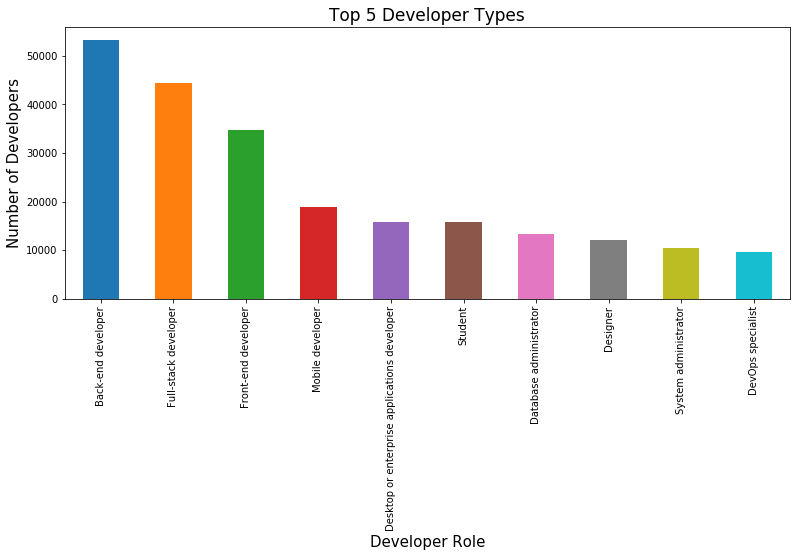

In [329]:

explode = (0.1,0,0,0,0)
plt.figure(figsize=(13,5))
dev_role_df['Number of Developers'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 5 Developer Types',fontsize=17)
plt.xlabel('Developer Role',fontsize=15)
plt.ylabel('Number of Developers',fontsize=15)


In [330]:
dev_stu = df_cleaned['Student'].dropna()
dev_student = {}
for role in dev_stu:
    dev_student[role] = (dev_student.get(role, 0)+1) 


In [331]:
dev_student_df = pd.DataFrame.from_dict(dev_student, orient='index',columns=['Students'])
total_developers = dev_stu.count()
dev_student_df

dev_student_df['Students'] = round(dev_student_df['Students']/total_developers*100,2)
# dev_student_df

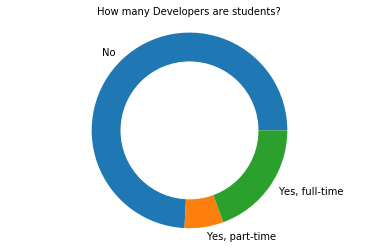

In [332]:
# explode=(0.1,0,0)
dev_student_df['Students'].plot.pie()
plt.title('How many Developers are students?', fontsize=10)
plt.axis("equal")
plt.ylabel(" ")
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


In [333]:
# Gender Analysis

Text(0.5,1,'Countries with highest number of Female Developers')

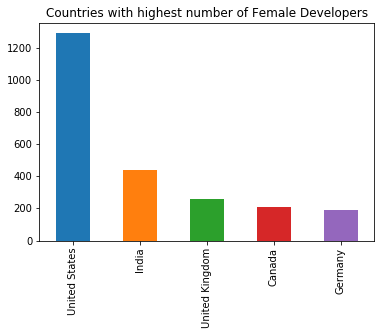

In [334]:
gender_df = df_cleaned[['Country','Gender']].dropna()
female_df = gender_df[gender_df['Gender'] == 'Female']
female_df['Country'].value_counts().head().plot(kind='bar')
plt.title('Countries with highest number of Female Developers')


In [356]:

gender_df_list = pd.DataFrame()
gender_df_list['Country'] = female_df['Country'].value_counts().index
gender_df_list['Count'] = female_df['Country'].value_counts().values
gender_df_list['Lat'] = ""
gender_df_list['Lng'] = ""
gender_df_list['Code'] = ""
gender_df_list = gender_df_list[gender_df_list.Country != 'Other Country (Not Listed Above)']


In [246]:
# def google_api_request(url, params=None):
#     params = params or {}
#     params['key'] = gkey
#     result = requests.get(url, params=params).json()
#     if 'error_message' in result:
#         raise Exception(result['error_message'])
#     return result['results']

# def geocode_results(address):
#     return google_api_request('https://maps.googleapis.com/maps/api/geocode/json', params={
#         'address': address,
#     })

# def place_results(lat, lng, radius=8000, place_type=None, keyword=None, rankby=None):
#     params = {
#         'location': f"{lat},{lng}",
#         'radius': radius,
#     }
#     if place_type:
#         params['type'] = place_type
#     if keyword:
#         params['keyword'] = keyword
#     if rankby:
#         params['rankby'] = rankby
#         del params['radius']
#     return google_api_request('https://maps.googleapis.com/maps/api/place/nearbysearch/json', params)

In [357]:
# # Loop through the cities_pd and run a lat/long search for each city
# for index, row in gender_df_list.iterrows():
#     country = row['Country']
#     print(country)
    
# #     results = geocode_results(f"{country}")
    
#     gender_df_list.loc[index, "Lat"] = results[0]["geometry"]["location"]["lat"]
#     gender_df_list.loc[index, "Lng"] = results[0]["geometry"]["location"]["lng"]
# # Visualize to confirm lat lng appear
# gender_df_list.head()


United States
India
United Kingdom
Canada
Germany
Russian Federation
Australia
France
Poland
Netherlands
Spain
Brazil
Romania
Israel
Ukraine
Argentina
Philippines
Pakistan
Sweden
Turkey
China
Malaysia
Iran, Islamic Republic of...
Ireland
Mexico
Austria
South Africa
Sri Lanka
Italy
Singapore
New Zealand
Finland
Switzerland
Norway
Nigeria
Denmark
Belgium
Bulgaria
Egypt
Serbia
Greece
Japan
Indonesia
Czech Republic
Bangladesh
Chile
Hungary
Hong Kong (S.A.R.)
Belarus
Taiwan
Colombia
Portugal
Morocco
Viet Nam
Tunisia
South Korea
Armenia
Lebanon
Saudi Arabia
Jordan
Thailand
Uruguay
Nepal
Croatia
Kenya
Venezuela, Bolivarian Republic of...
Myanmar
Latvia
Estonia
Slovenia
Lithuania
Albania
Peru
The former Yugoslav Republic of Macedonia
Slovakia
Ethiopia
Bosnia and Herzegovina
United Arab Emirates
Ghana
Algeria
Paraguay
Malta
Georgia
Republic of Moldova
Cuba
Republic of Korea
Jamaica
Luxembourg
Guatemala
Mauritius
Zimbabwe
Iceland
Bolivia
Iraq
El Salvador
Costa Rica
Malawi
Maldives
Sudan
Kazakhst

,Country,Count,Lat,Lng,Code
0,United States,1288,42.5063,1.5218,
1,India,440,42.5063,1.5218,
2,United Kingdom,256,42.5063,1.5218,
3,Canada,208,42.5063,1.5218,
4,Germany,193,42.5063,1.5218,


In [358]:
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
for index, row in gender_df_list.iterrows():
    country = row['Country']
    for index2, row2 in df_code.iterrows():
        if country == row2['COUNTRY']:
            gender_df_list.loc[index, "Code"] = row2['CODE']
    

In [359]:
gender_df_list

,Country,Count,Lat,Lng,Code
0,United States,1288,42.5063,1.5218,USA
1,India,440,42.5063,1.5218,IND
2,United Kingdom,256,42.5063,1.5218,GBR
3,Canada,208,42.5063,1.5218,CAN
4,Germany,193,42.5063,1.5218,DEU
5,Russian Federation,95,42.5063,1.5218,
6,Australia,85,42.5063,1.5218,AUS
7,France,83,42.5063,1.5218,FRA
8,Poland,73,42.5063,1.5218,POL
9,Netherlands,66,42.5063,1.5218,NLD


In [360]:

df = gender_df_list

data = [ dict(
        type = 'choropleth',
        locations = df['Code'],
        z = df['Count'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Number of Female Developers'),
      ) ]

layout = dict(
    title = 'Female Developers',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='female_developers-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shameetha/0 or inside your plot.ly account where it is named 'd3-world-map'


In [ ]:
# Coding as Hobby

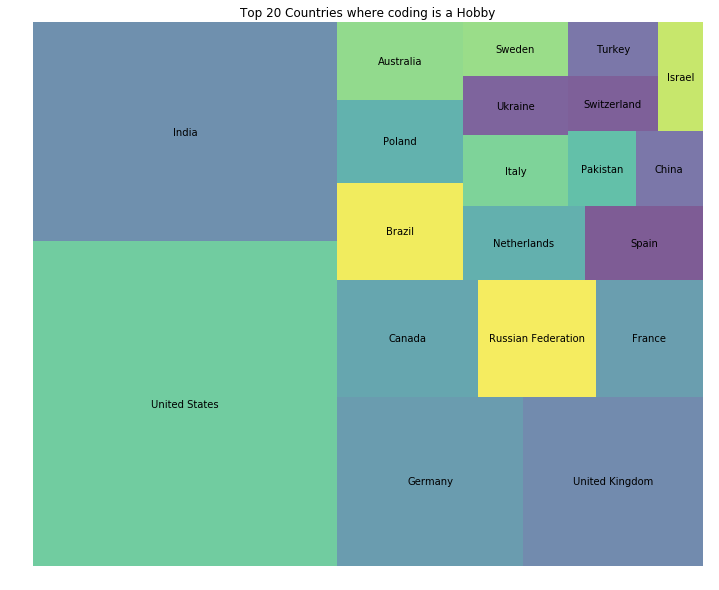

In [167]:
df_hobby = df_cleaned[['Country', 'Hobby']].dropna()
country = df_hobby['Country'].value_counts().index
value = df_hobby['Country'].value_counts().values



# print(country[:20])
plt.figure(figsize=(12,10))
# If you have 2 lists
squarify.plot(sizes=value[:20], label=country[:20], alpha=.7)
plt.axis('off')
plt.title('Top 20 Countries where coding is a Hobby')
plt.show()

In [187]:
#Highest Degree done by Developers


(-1.1117691655511515,
 1.1005604364548167,
 -1.109732241105186,
 1.1067785659712486)

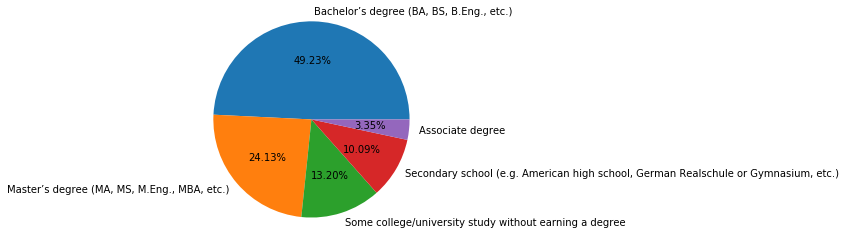

In [217]:
degree_df = df_cleaned['FormalEducation'].dropna()
degree = degree_df.value_counts().index
count = degree_df.value_counts().values
plt.pie(x = count[:5], 
        labels = degree[:5], 
        autopct = '%.2f%%')
plt.axis('equal')

In [361]:
# exp_dev_df = df_cleaned[['YearsCodingProf','DevType']].dropna(how='any')
# grouped = exp_dev_df.groupby(['YearsCodingProf'])
# # exp = exp_dev_df['YearsCodingProf'].head(10)
# # dev = exp_dev_df['DevType'].head(10)
# # # newdf = pd,DataFrame(exp, dev, index=exp)
# # exp_dev_df.sum()
# for name,group in grouped:
# #     print(name)
# #     print(group['DevType'])
#     for roles in group['DevType']:
#     role_list= roles.split(';')
#     for role in role_list:
#         dev_role[role] = (dev_role.get(role, 0)+1) 
# #     for 

In [ ]:
#